# sonar3 data, classification

### Library import

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import KFold

### Random seed

* 동일한 난수 결과를 얻기 위함
* TensorFlow 모델 가중치 초기화, 랜덤 텐서 생성 등에서 동일한 결과 보장 

In [16]:
np.random.seed(3)
tf.random.set_seed(3)

### Data import

* sonar3.csv 

In [17]:
df = pd.read_csv('./data/sonar3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


* y data counting

In [18]:
df[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

### Feature, Target seperate

In [19]:
X = df.iloc[:, 0:60]
y = df.iloc[:, 60]

X.head(), y.head()

(       0       1       2       3   ...      56      57      58      59
 0  0.0200  0.0371  0.0428  0.0207  ...  0.0180  0.0084  0.0090  0.0032
 1  0.0453  0.0523  0.0843  0.0689  ...  0.0140  0.0049  0.0052  0.0044
 2  0.0262  0.0582  0.1099  0.1083  ...  0.0316  0.0164  0.0095  0.0078
 3  0.0100  0.0171  0.0623  0.0205  ...  0.0050  0.0044  0.0040  0.0117
 4  0.0762  0.0666  0.0481  0.0394  ...  0.0072  0.0048  0.0107  0.0094
 
 [5 rows x 60 columns],
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: 60, dtype: int64)

### Train / Test split

* Prevent overfitting
* Model train -> train data / Model evaluation -> test data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

### Define model

* Binary classification => sigmoid (activation) 
* in general, the ReLU activation function is commonly used alongside the sigmoid function

In [21]:
model = Sequential()

# 입력층
model.add(Input(shape=(60,)))  # Input 객체를 첫 레이어로 사용

# 은닉층
model.add(Dense(24, activation="relu"))
model.add(Dense(10, activation="relu"))

# 출력층
model.add(Dense(1, activation="sigmoid"))

* Loss function => binary_crossentropy
    * calculate the error between model expected values and real values

* Optimizer => adam
    * Based on SGD, automatically tunes learning rates

* Metrics => accuracy
    * Measure how accurately the model predictions

In [22]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

* model summary

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 24)             │         1,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,725 (6.74 KB)

 Trainable params: 1,725 (6.74 KB)

 Non-trainable params: 0 (0.00 B)

* epochs
    * Count the number of times the entire dataset is trained

* batch_size
    * Input data size for each weight update

* entire dataset is trained 80 times
* batch size => 10 
    * train data length is 145
    * 145 / 10 => 14.5 (15)
    * The number of time the weight update is 15 (each epochs)

In [25]:
hist = model.fit(X_train, y_train, epochs=80, batch_size=10)

Epoch 1/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.4682 - loss: 0.6959
Epoch 2/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5647 - loss: 0.6735
Epoch 3/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.6272 - loss: 0.6628
Epoch 4/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.6364 - loss: 0.6526
Epoch 5/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.6729 - loss: 0.6420
Epoch 6/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.6798 - loss: 0.6309
Epoch 7/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.7035 - loss: 0.6208
Epoch 8/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.7065 - loss: 0.6102
Epoch 9/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.7262 - loss: 0.5993
Epoch 10/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.7182 - loss: 0.5878
Epoch 11/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.7340 - loss: 0.5764
Epoch 12/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step -

* evaluate
    * [Loss, Accuracy]

In [26]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.4473 


[0.45234987139701843, 0.7936508059501648]

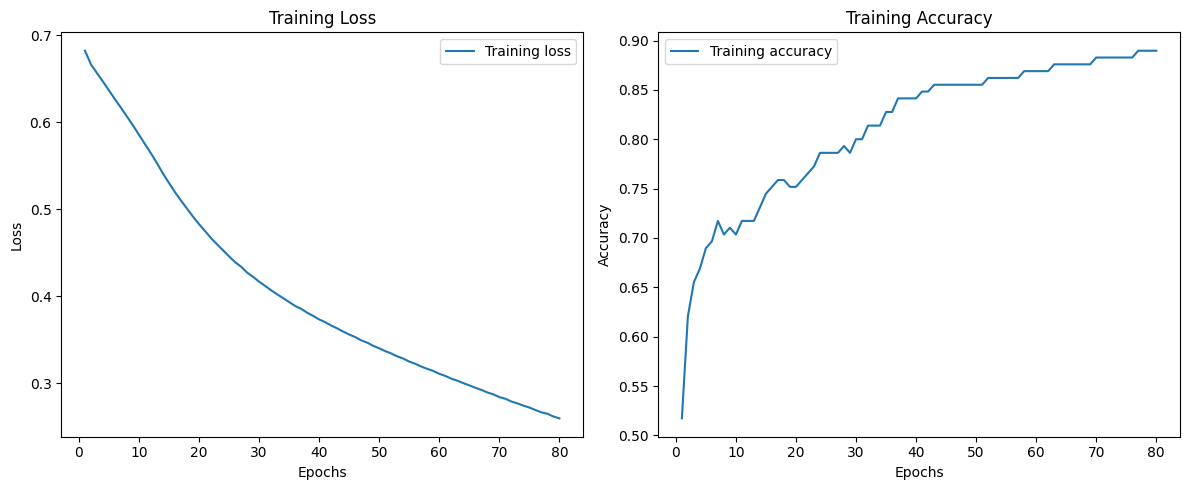

In [27]:
loss = hist.history['loss'] ## loss
accuracy = hist.history['accuracy'] ## accuracy
epochs = range(1, len(loss) + 1) ## epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


# KFold cross validation

* KFold CV
    * Entire dataset split by "k" (k is int)

In [29]:
k=5
kfold = KFold(n_splits=k, shuffle=True)

In [30]:
def model_fn():
    model = Sequential()
    model.add(Input(shape=(60,)))
    model.add(Dense(24, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    return model

In [34]:
acc_score = []

# kfold split -> train_index, test_index
for train_index, test_index in kfold.split(X):

    # define train index, test index
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # model
    model = model_fn()
    
    # compile
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    # train
    hist = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)

    # accuracy
    accuracy = model.evaluate(X_test, y_test)
    print(accuracy)
    acc_score.append(accuracy[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8001 - loss: 0.7900 
[0.7226483225822449, 0.8095238208770752]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8948 - loss: 0.6216 
[0.5652133226394653, 0.9047619104385376]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8264 - loss: 0.7995 
[0.7338466644287109, 0.8333333134651184]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7703 - loss: 0.5658 
[0.5507982969284058, 0.7804877758026123]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7645 - loss: 0.9384 
[0.9043940305709839, 0.7560975551605225]


In [35]:
acc_score

[0.8095238208770752,
 0.9047619104385376,
 0.8333333134651184,
 0.7804877758026123,
 0.7560975551605225]

In [36]:
avg_acc_score = sum(acc_score) / k
print(avg_acc_score)

0.8168408751487732
